# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


IMPORTANTO O DATAFRAME A SER TRABALHADO E SEPARANDO A VARIAVEL RESPOSTA DA VARIAVEL EXPLICATIVA:

In [136]:
df = pd.read_csv("C:/Users/rodri/encoded_demo.csv")
y = df['mau_True']
X = df.drop('mau_True', axis=1)


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

DEFININDO A ARVORE DE DECISÃO:

In [138]:
clf = DecisionTreeClassifier(random_state=100)

USANDO OS DADOS SEPARADOS PARA TREINAMENTO:

In [139]:
clf = clf.fit(X_train, y_train)

In [140]:
clf.score(X_train, y_train)

1.0

VISUALIZANDO A ÁRVORE:

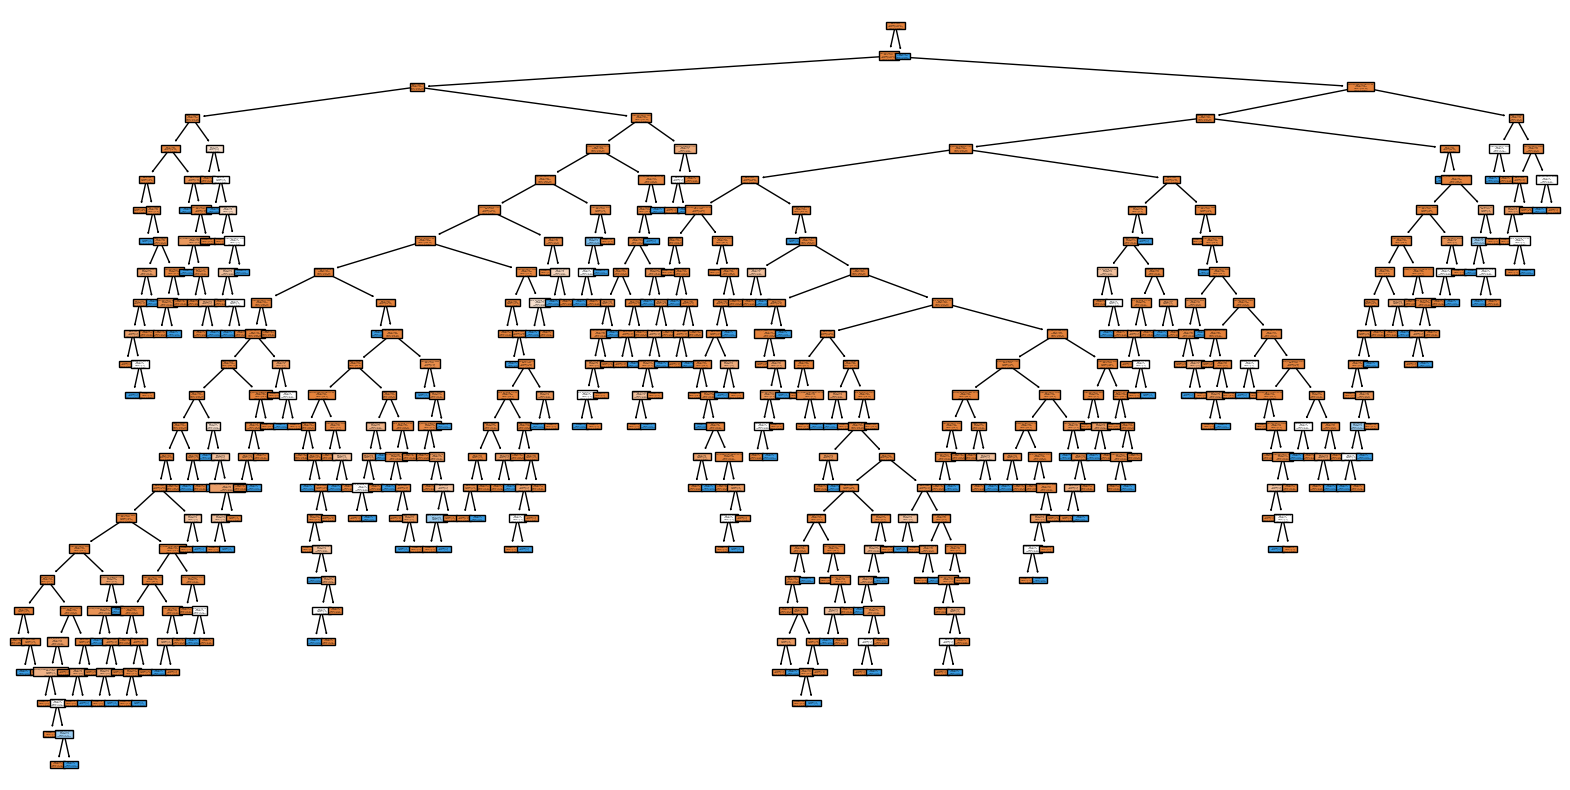

In [143]:
plt.figure(figsize=(20,10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X_train.columns);

VISUALIZANDO A MATRIZ DE CONFUSAO DE TREINO:

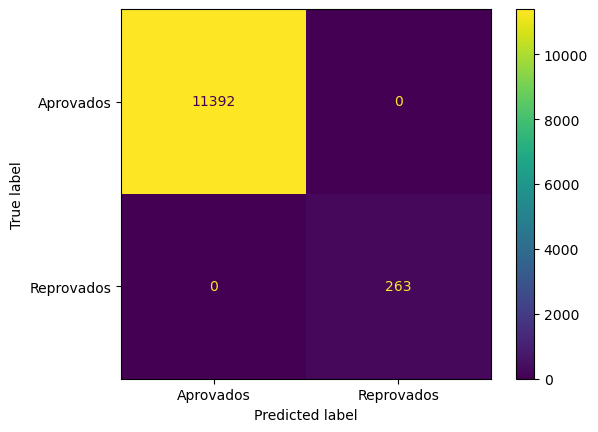

In [152]:
prediction = clf.predict(X_train)
cm = confusion_matrix(y_train, prediction, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= ['Aprovados','Reprovados'])
disp.plot()

VERIFICANDO A ACURÁCIA DO TREINO:

In [153]:
predict_X_train = clf.predict(X_train)
accuracy_score(y_train,predict_X_train )

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

USANDO DADOS SEPARADOS PARA TESTE

DEFININDO O MODELO:

In [151]:
clf_teste = DecisionTreeClassifier(random_state=100)

clf_teste = clf_teste.fit(X_test, y_test)

In [148]:
y_chapeu_teste = clf.predict(X_test)

VERIFICANDO A MATRIZ DE CONFUSÃO DE TESTE:

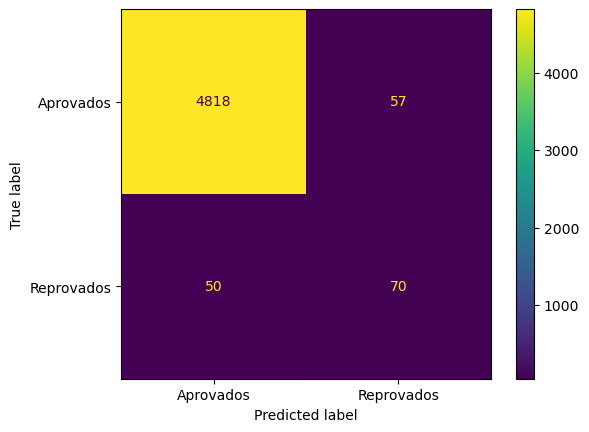

In [154]:
prediction1 = clf.predict(X_test)
cm = confusion_matrix(prediction1 ,y_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= ['Aprovados','Reprovados'])
disp.plot()

In [155]:
X_test.shape

(4995, 29)

CALCULANDO A ACURÁCIA DA BASE DE TESTE:

In [156]:
accuracy_score(y_test, y_chapeu_teste)

0.9785785785785786

In [157]:
(4818 + 70)/(4995)

0.9785785785785786

In [158]:
classifier = DecisionTreeClassifier(max_depth=10,min_samples_split=5, random_state=123)
classifier.fit(X_test, y_test)

DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=123)

VISUALIZANDO A ÁRVORE DE TESTE 2 

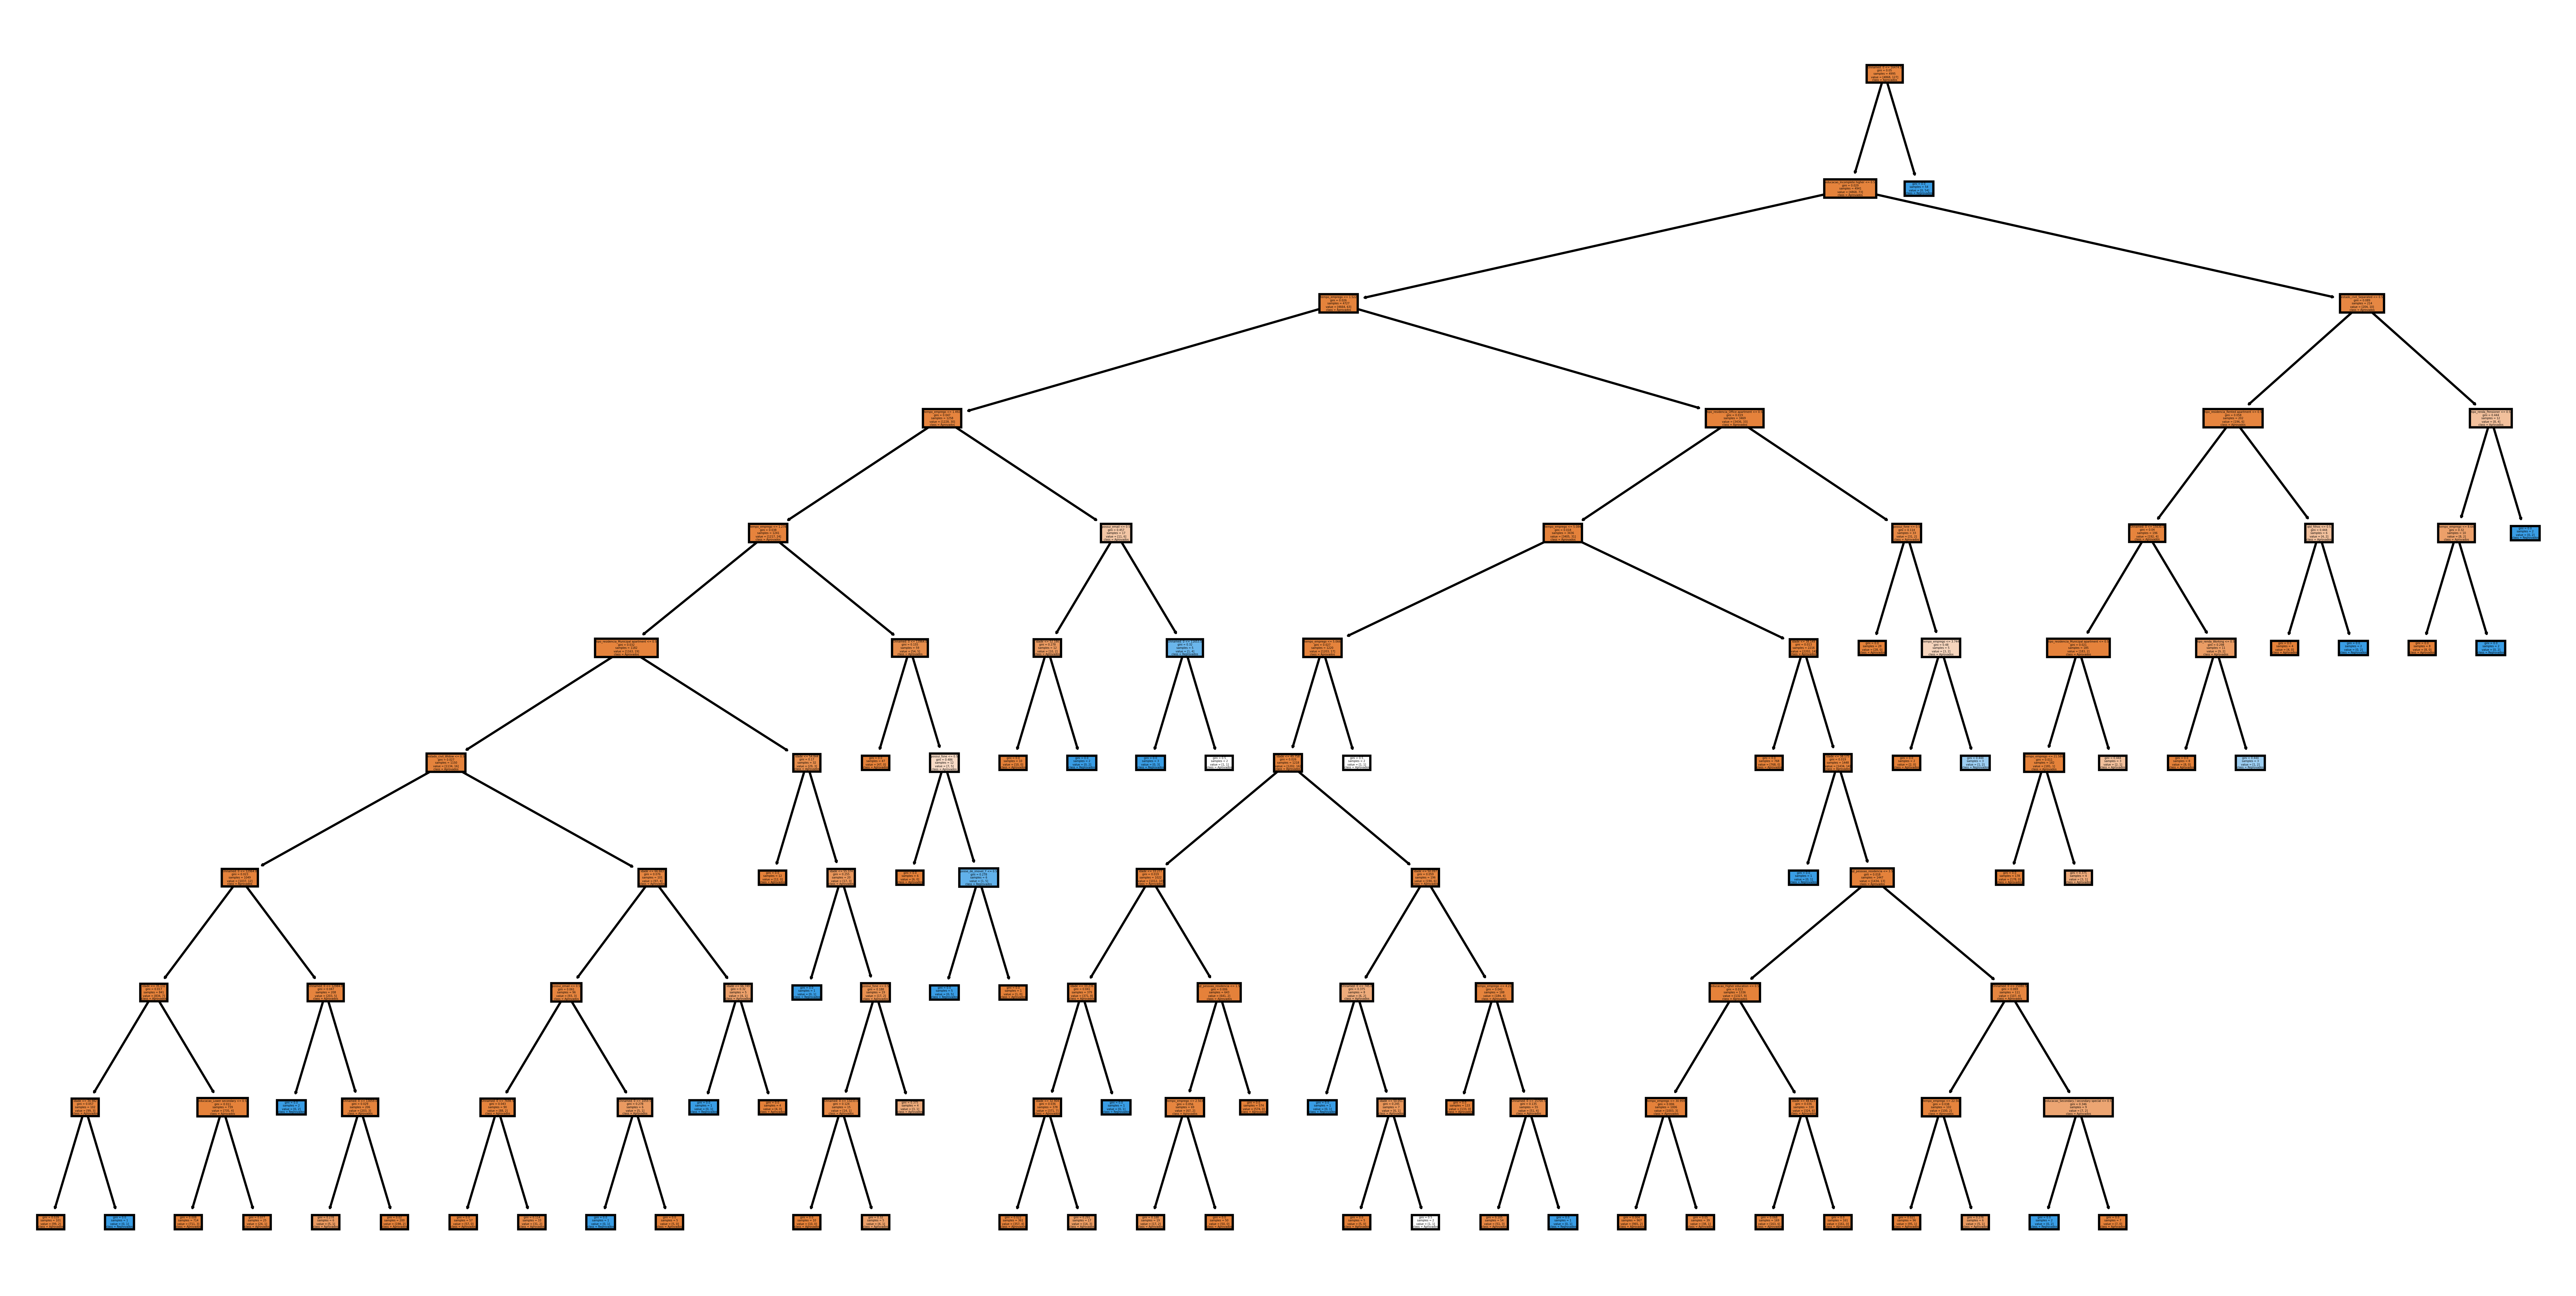

In [159]:
plt.figure(figsize=(20,10), dpi=600)
plot_tree(classifier,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names= X_test.columns);


VISUALIZANDO A MATRIZ DE CONFUSAO DE TESTE 2

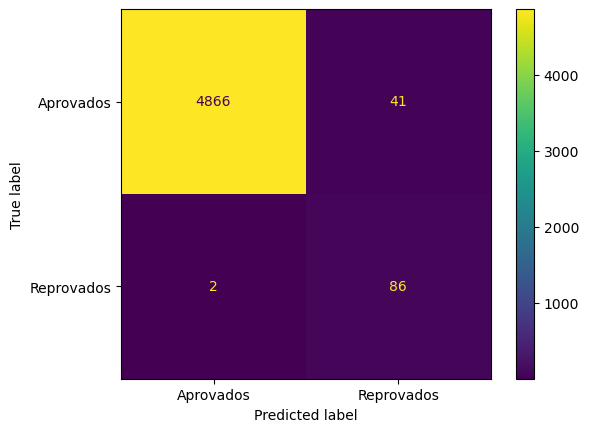

In [162]:
prediction2 = classifier.predict(X_test)
cm = confusion_matrix(prediction2 ,y_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= ['Aprovados','Reprovados'])
disp.plot()

In [164]:
X_test.shape

(4995, 29)

In [165]:
predict = classifier.predict(X_test)
accuracy_score(y_test, predict)

0.9913913913913914

Proporção de proponentes classificados como maus:

In [168]:
(86 / (86 + 41 + 2 + 4866)) 

0.017217217217217216

Trocando os valores de 1 para 0 para que todos clientes virem bons pagadores e vamos calcular a acurácia:

In [170]:
y_bom = y_test.replace({1:0})
clf_teste_3 = DecisionTreeClassifier(random_state=100)
clf_teste_3 = clf_teste_3.fit(X_test,y_bom)
accuracy_score(y_bom, clf_teste_3.predict(X_test))


1.0